<a href="https://colab.research.google.com/github/abdulkerimosman/datascience/blob/main/Unit3Q10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly,
                         Column)

In [ ]:
carseats = load_data('Carseats')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
carseats.drop(columns=['ShelveLoc','Urban','US','Sales']).corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [ ]:
carseats_encoded = pd.get_dummies(carseats, drop_first=True, dtype=int)
carseats_encoded

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [ ]:
carseats_encoded.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.500510,-0.073999,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.026386,0.008683,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.012657,-0.051392,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056149,-0.015929,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.007789,-0.040640,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.045854,-0.006607,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.022818,0.056613,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.029188,0.013242,-0.033094,-0.078250
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,1.000000,-0.571396,-0.039197,0.078864
ShelveLoc_Medium,-0.073999,0.008683,-0.051392,-0.015929,-0.040640,-0.006607,0.056613,0.013242,-0.571396,1.000000,-0.037391,-0.065656


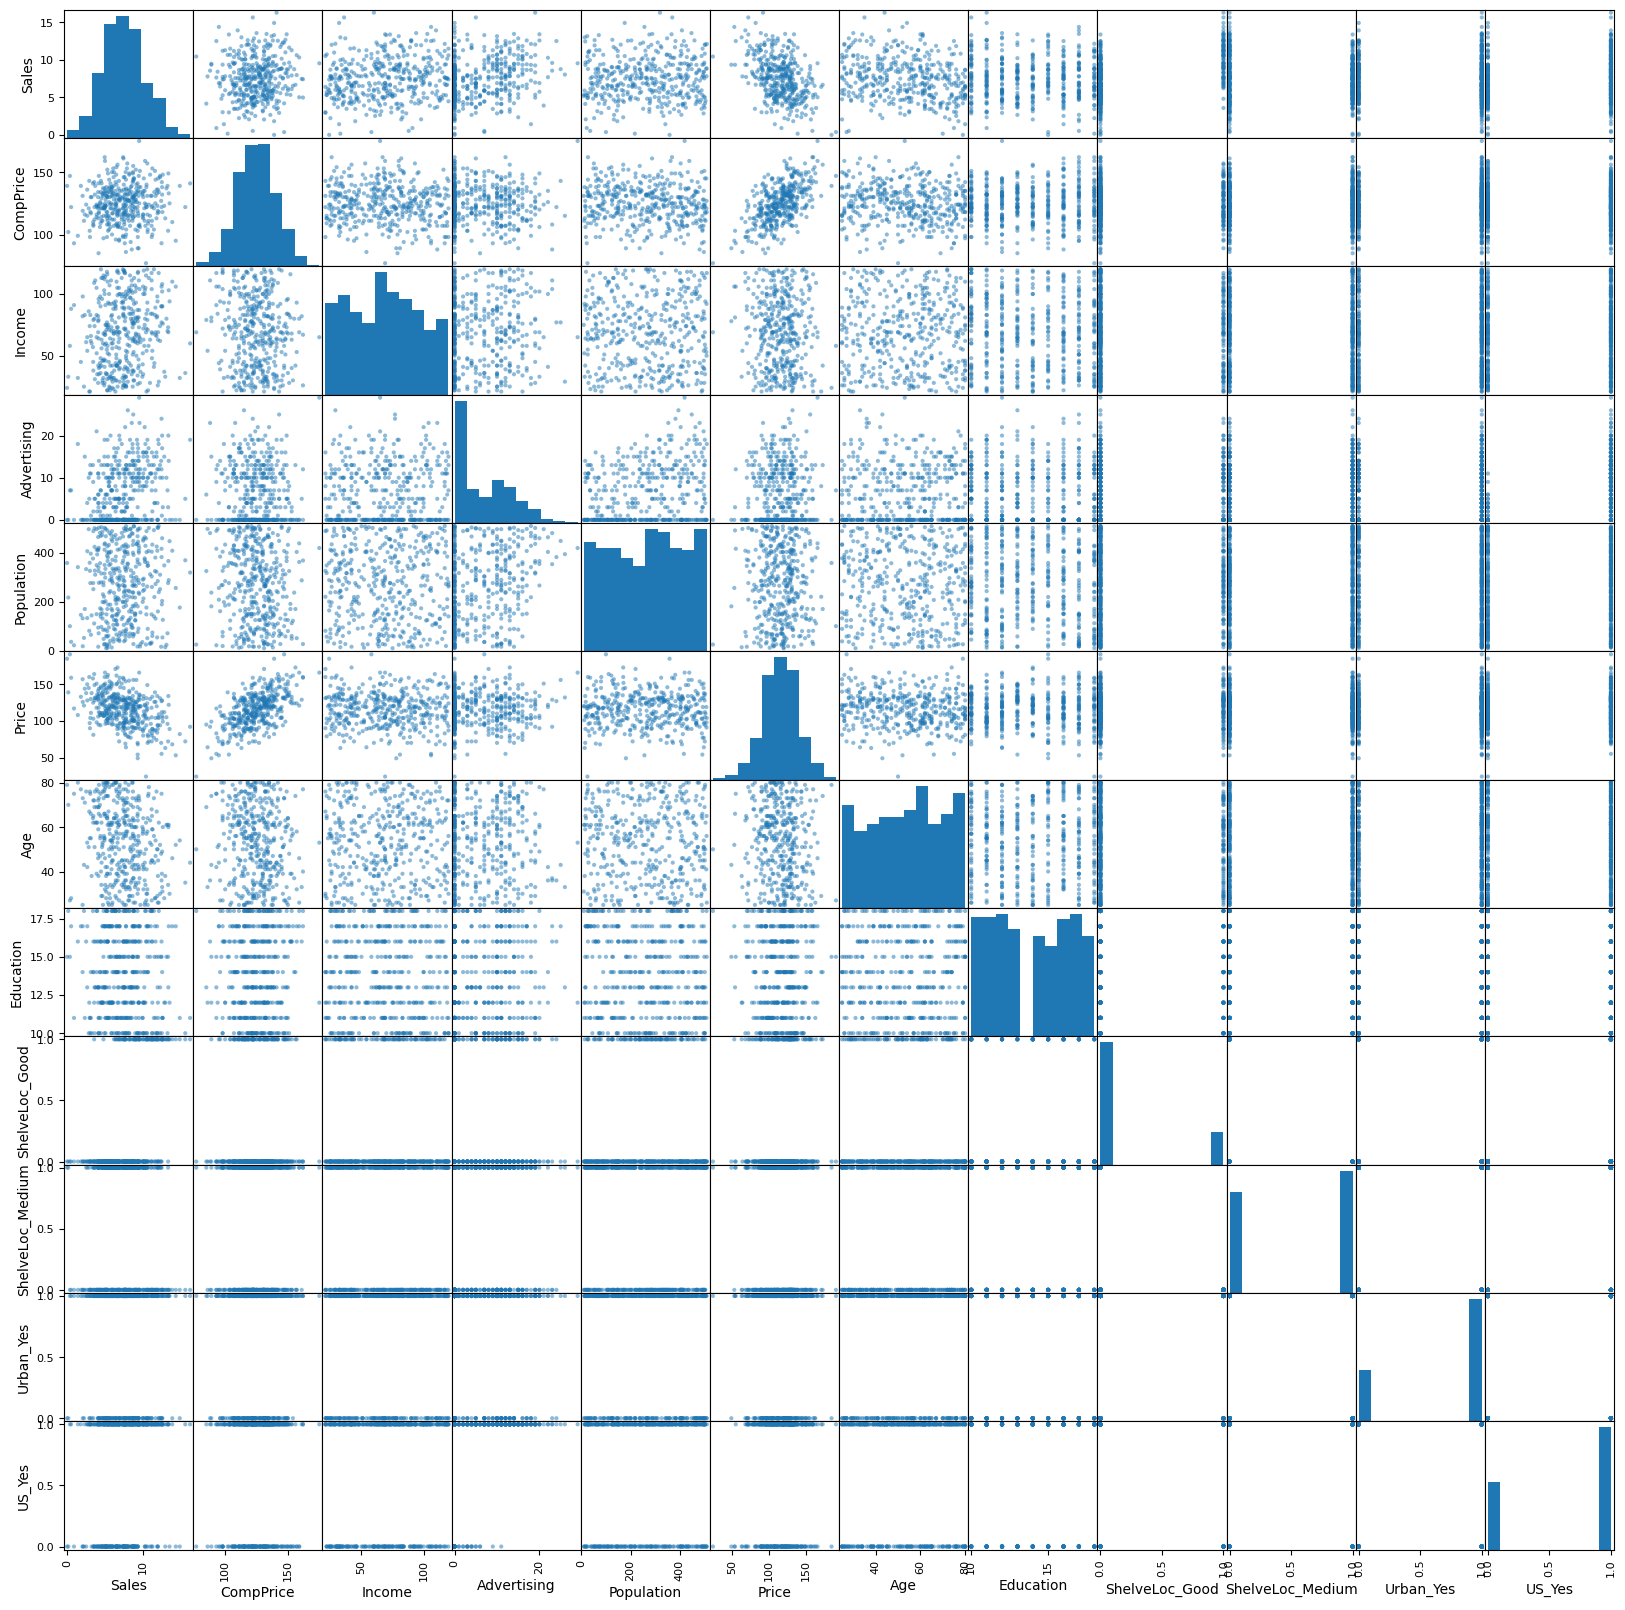

In [ ]:
pd.plotting.scatter_matrix(carseats_encoded, figsize=(20,20));

In [ ]:
matrix_VIF = sm.add_constant(carseats_encoded)
matrix_VIF

,const,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1.0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,1.0,11.22,111,48,16,260,83,65,10,1,0,1,1
2,1.0,10.06,113,35,10,269,80,59,12,0,1,1,1
3,1.0,7.40,117,100,4,466,97,55,14,0,1,1,1
4,1.0,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,12.57,138,108,17,203,128,33,14,1,0,1,1
396,1.0,6.14,139,23,3,37,120,55,11,0,1,0,1
397,1.0,7.41,162,26,12,368,159,40,18,0,1,1,1
398,1.0,5.94,100,79,7,284,95,50,12,0,0,1,1


In [ ]:
VIF_data = pd.DataFrame()
VIF_data['Features'] = matrix_VIF.drop(columns=['Sales']).columns
VIF_data['VIF'] = [variance_inflation_factor(matrix_VIF.values, i) for i in range(matrix_VIF.drop(columns=['Sales']).shape[1])]
VIF_data

,Features,VIF
0,const,172.113746
1,CompPrice,7.899727
2,Income,3.561061
3,Advertising,1.218463
4,Population,2.766909
5,Price,1.146464
6,Age,6.586027
7,Education,1.572190
8,ShelveLoc_Good,1.029371
9,ShelveLoc_Medium,5.420361


In [ ]:
model = smf.ols('Sales ~ CompPrice + Income + Advertising + Price + Age + Education + ShelveLoc_Good + ShelveLoc_Medium ', data=carseats_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.1
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.40e-169
Time:                        19:22:55   Log-Likelihood:                -570.63
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7688      0.573     10.070      0.000       4.643       6.895
CompPrice            0.0927      0.004     22.472      0.000       0.085       0.101
Income               0.0157      0.002      8.521      0.000       0.012       0.019
Advertising          0.1157      0.008     14.974      0.000       0.100       0.131
Price               -0.0953      0.003    -35.708      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.515      0.000      -0.052      -0.040
Education           -0.0212      0.020     -1.085      0.279      -0.060       0.017
ShelveLoc_Good       4.8310      0.153     31.673      0.000       4.531       5.131
ShelveLoc_Medium     1.9508      0.125     15.563      0.000       1.704       2.197
==============================================================================
Omnibus:                        1.017   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.974
Skew:                           0.121   Prob(JB):                        0.615
Kurtosis:                       2.989   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
result = anova_lm(model)
print(result)

                     df       sum_sq      mean_sq            F         PR(>F)
CompPrice           1.0    13.066686    13.066686    12.578831   4.374688e-04
Income              1.0    79.073362    79.073362    76.121097   7.782620e-17
Advertising         1.0   219.351268   219.351268   211.161620   1.471468e-38
Price               1.0  1198.885054  1198.885054  1154.123761  9.926415e-119
Age                 1.0   209.001465   209.001465   201.198235   3.900408e-37
Education           1.0     4.214271     4.214271     4.056928   4.467484e-02
ShelveLoc_Good      1.0   800.921360   800.921360   771.018347   1.642506e-94
ShelveLoc_Medium    1.0   251.596771   251.596771   242.203213   7.609702e-43
Residual          391.0   406.164462     1.038784          NaN            NaN


Why the difference?


t-test in the model summary tests the individual significance of a predictor, assuming all other predictors are held constant.


F-test in the ANOVA table tests the contribution of a predictor when all other predictors are included in the model. In the context of the whole model, Education may still have some unique explanatory power, even if its effect is not significant when considered alone.

Population, US and Urban are not significant


In [ ]:
model2 = smf.ols('Sales ~ CompPrice + Income + Age + Advertising + Price  + ShelveLoc_Good + ShelveLoc_Medium ', data=carseats_encoded).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.25e-170
Time:                        19:22:55   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4752      0.505     10.842      0.000       4.482       6.468
CompPrice            0.0926      0.004     22.451      0.000       0.084       0.101
Income               0.0158      0.002      8.590      0.000       0.012       0.019
Age                 -0.0461      0.003    -14.521      0.000      -0.052      -0.040
Advertising          0.1159      0.008     15.006      0.000       0.101       0.131
Price               -0.0953      0.003    -35.699      0.000      -0.101      -0.090
ShelveLoc_Good       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc_Medium     1.9520      0.125     15.569      0.000       1.706       2.198
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
result2 = anova_lm(model2)
print(result2)

                     df       sum_sq      mean_sq            F         PR(>F)
CompPrice           1.0    13.066686    13.066686    12.573162   4.386307e-04
Income              1.0    79.073362    79.073362    76.086788   7.836488e-17
Age                 1.0   160.422377   160.422377   154.363279   4.115548e-30
Advertising         1.0   217.004449   217.004449   208.808266   3.050013e-38
Price               1.0  1249.810960  1249.810960  1202.606032  1.697965e-121
ShelveLoc_Good      1.0   803.594401   803.594401   773.242918   9.119141e-95
ShelveLoc_Medium    1.0   251.915602   251.915602   242.400837   6.806830e-43
Residual          392.0   407.386861     1.039252          NaN            NaN


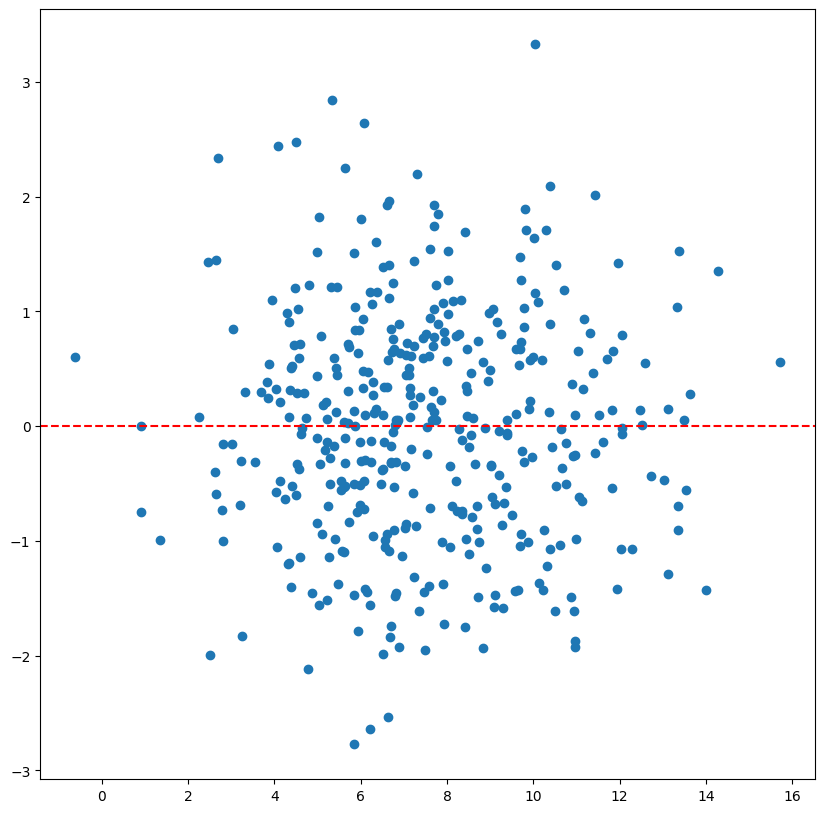

In [ ]:
ax = plt.subplots(figsize=(10,10))[1]
ax.scatter(model2.fittedvalues, model2.resid)
ax.axhline(y=0, color='r', linestyle='--')
plt.show()


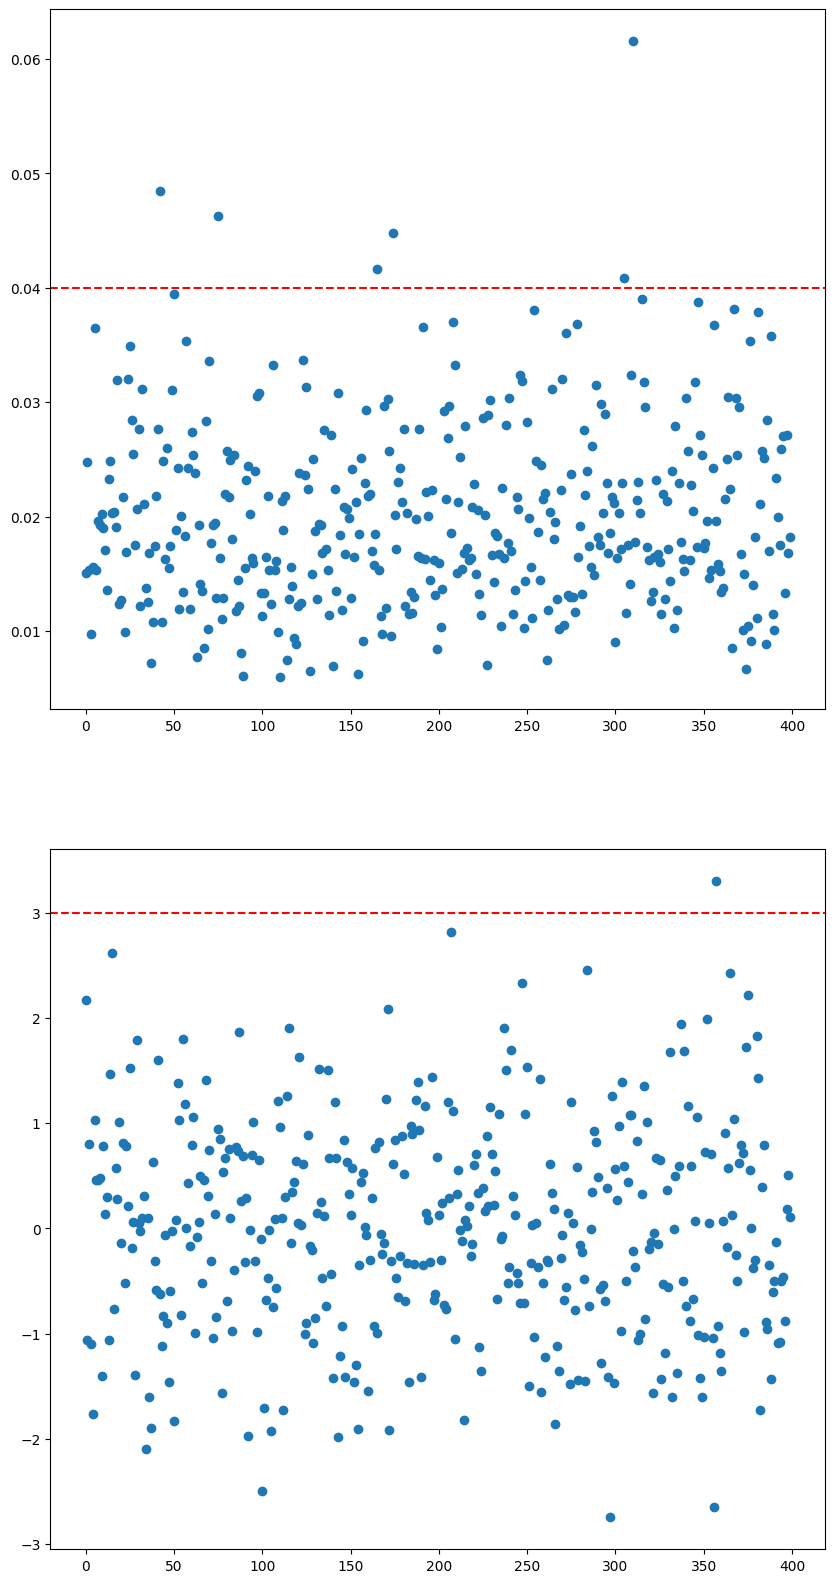

357

In [ ]:
inf2 = model2.get_influence()
leverage_threshold = 2 * (model2.df_model + 1) / model2.nobs
inf2_graph_data = pd.DataFrame({
    'index' : np.arange(400),
    'hat_matrix_diag' : inf2.hat_matrix_diag,
    'resid_studentized_internal' : inf2.resid_studentized_internal
    })
ax1,ax2 = plt.subplots(2,1,figsize=(10,20))[1]
ax1.scatter(np.arange(400), inf2.hat_matrix_diag)
ax2.scatter(np.arange(400), inf2.resid_studentized_internal)
ax2.axhline(y=3, color='r', linestyle='--')
ax1.axhline(y = leverage_threshold, color='r', linestyle='--')
plt.show()
np.argmax(inf2.resid_studentized_internal)

In [ ]:
inf2_graph_data
leverage_threshold

0.04

In [ ]:
inf_delete = inf2_graph_data.loc[
    (inf2_graph_data['resid_studentized_internal'] > 3) | (inf2_graph_data['hat_matrix_diag'] > leverage_threshold)
].index


In [ ]:
carseats_encoded.drop(index=inf_delete, inplace=True)
carseats_encoded

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [ ]:
model3 = smf.ols('Sales ~ CompPrice + Income + Age + Advertising + Price  + ShelveLoc_Good + ShelveLoc_Medium ', data=carseats_encoded).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     368.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          2.43e-166
Time:                        19:22:56   Log-Likelihood:                -557.65
No. Observations:                 393   AIC:                             1131.
Df Residuals:                     385   BIC:                             1163.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.2732      0.521     10.120      0.000       4.249       6.298
CompPrice            0.0935      0.004     22.412      0.000       0.085       0.102
Income               0.0158      0.002      8.599      0.000       0.012       0.019
Age                 -0.0454      0.003    -14.229      0.000      -0.052      -0.039
Advertising          0.1153      0.008     14.513      0.000       0.100       0.131
Price               -0.0949      0.003    -34.594      0.000      -0.100      -0.089
ShelveLoc_Good       4.8325      0.152     31.777      0.000       4.533       5.131
ShelveLoc_Medium     1.9314      0.126     15.385      0.000       1.685       2.178
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.056
Skew:                           0.037   Prob(JB):                        0.590
Kurtosis:                       2.757   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
VIF_data = pd.DataFrame()
VIF_data['Features'] = carseats_encoded.drop(columns=['Sales','Population','Education','Urban_Yes','US_Yes','ShelveLoc_Good']).columns
VIF_data['VIF'] = [variance_inflation_factor(carseats_encoded.values, i) for i in range(carseats_encoded.drop(columns=['Sales','Population','Education','Urban_Yes','US_Yes','ShelveLoc_Good']).shape[1])]
VIF_data

,Features,VIF
0,CompPrice,53.436434
1,Income,249.014164
2,Advertising,8.559367
3,Price,5.309859
4,Age,4.472163
5,ShelveLoc_Medium,142.663091


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model3.predict(carseats_encoded)
y_true = carseats_encoded['Sales']

# Compute RMSE and R²
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 1.000026481068547
R² Score: 0.8701514378732254


Fix the correlation
